<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part1-：-Monte-Carlo-simulation" data-toc-modified-id="Part1-：-Monte-Carlo-simulation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part1 ： Monte Carlo simulation</a></span><ul class="toc-item"><li><span><a href="#编写服从几何布朗运动的股价序列生成函数" data-toc-modified-id="编写服从几何布朗运动的股价序列生成函数-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>编写服从几何布朗运动的股价序列生成函数</a></span></li><li><span><a href="#定义-monte-carlo-simulation-获得期权收益序列的函数" data-toc-modified-id="定义-monte-carlo-simulation-获得期权收益序列的函数-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>定义 monte carlo simulation 获得期权收益序列的函数</a></span></li><li><span><a href="#给定参数获得收益率序列，并计算其均值和方差" data-toc-modified-id="给定参数获得收益率序列，并计算其均值和方差-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>给定参数获得收益率序列，并计算其均值和方差</a></span><ul class="toc-item"><li><span><a href="#编写期权定价函数，并返回收益贴现均值（期权定价的估计值）+估计值方差" data-toc-modified-id="编写期权定价函数，并返回收益贴现均值（期权定价的估计值）+估计值方差-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>编写期权定价函数，并返回收益贴现均值（期权定价的估计值）+估计值方差</a></span></li></ul></li></ul></li><li><span><a href="#Part2-：-B-S-formular-to-calculate-accurate-solution" data-toc-modified-id="Part2-：-B-S-formular-to-calculate-accurate-solution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part2 ： B-S formular to calculate accurate solution</a></span></li><li><span><a href="#Part-3:-numerical-error-analysis-for-time-discretization" data-toc-modified-id="Part-3:-numerical-error-analysis-for-time-discretization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Part 3: numerical error analysis for time discretization</a></span></li><li><span><a href="#实验代码" data-toc-modified-id="实验代码-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>实验代码</a></span></li></ul></div>

# 金工Report： Task2

* 导入包

In [130]:
import numpy as np
from scipy.stats import norm #用于计算标准正态分布的累积分布函数
from matplotlib import pyplot as plt

## Part1 ： Monte Carlo simulation

假设股价服从几何布朗运动，从lnSt产生的路径中抽样会更为精准，其服从的过程为
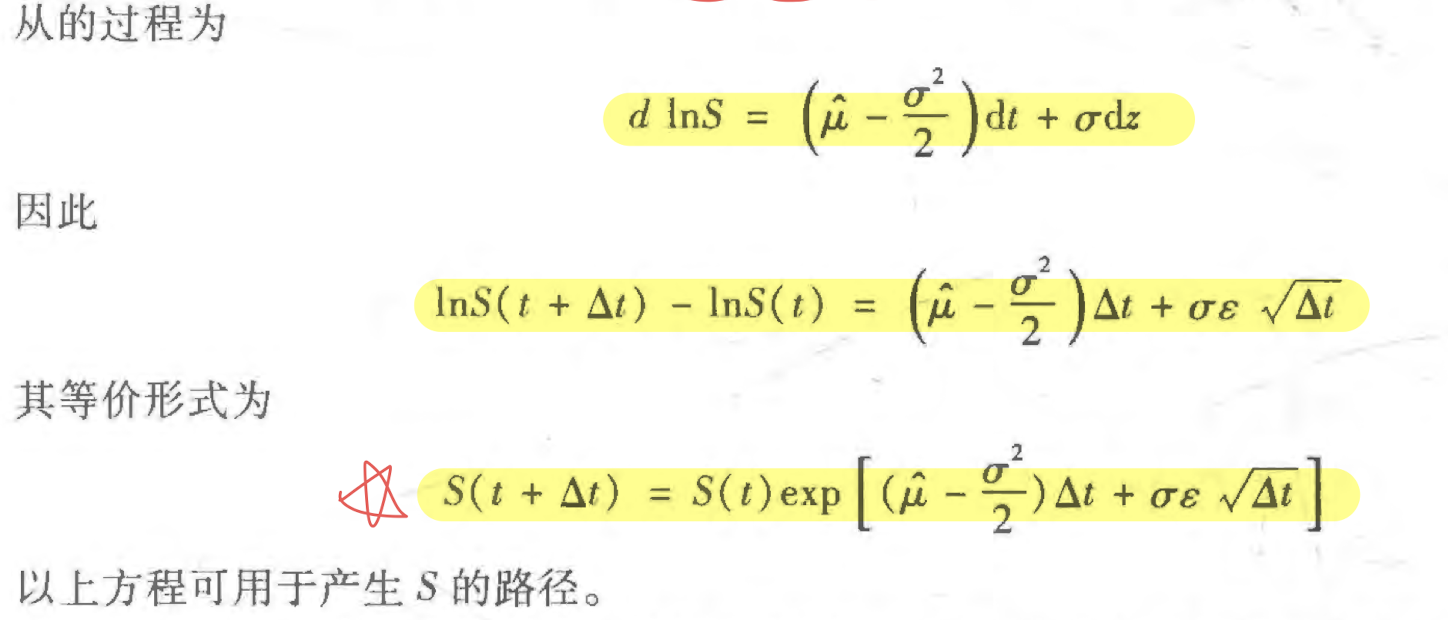

故，对任何期限T有：
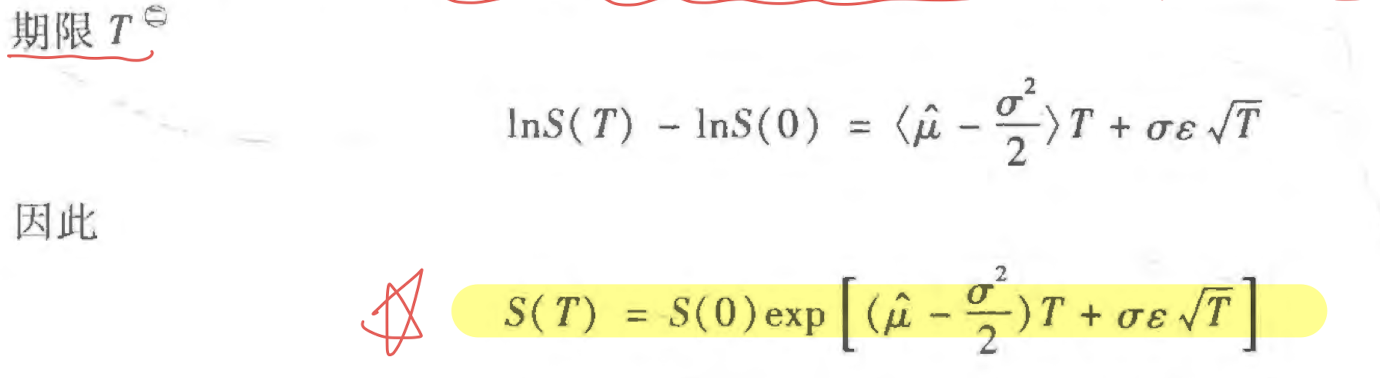

### 编写服从几何布朗运动的股价序列生成函数

In [51]:
#s0,u,sigma,delta_t,T=50,0.05,0.3,0.2,1
def ST_price(s0,u,sigma,delta_t,T=1): 
    # t=0时的初始股价s0，期望收益率u，风险中性条件下u=r，sigma是股价波动率，delta_t 是离散形式下时间区间的长度
    # T为总期权期限，这里默认为单位1
    St=[]# 空列表，用于存储股价序列
    N=int(T/delta_t)#离散化后的时间区间数量
    epsilon=np.random.normal(0,1,size=N) #生成独立的N个标准正态分布
    st_1=s0 #表示上一时间区间末的股价，初始化为s0
    for i in range(N):
        st=st_1* np.exp( (u-sigma**2/2)*delta_t+sigma*epsilon[i]*np.sqrt(delta_t))
        St.append(st) #将生成的下一区间末的股价加入到股价序列中
        st_1=st #将st存储为上一区间股价，以便用于下一个区间t+1股价的计算
    #print(St)
    return St[-1] #最后返回生成序列的最后一个股价，也就是t=T时的股价
        
           
#实验
s0,u,sigma,delta_t,T=50,0.05,0.3,0.2,1
ST_price(s0,u,sigma,delta_t,T)
ST_price(50,0.05,0.3,0.2,1)
#ST_price(50,0.05, 0.3, 0.2 , 1)
#ST_price(50, 0.05, 0.3,0.2,1)
#print(a)

37.22263186850183

### 定义 monte carlo simulation 获得期权收益序列的函数

In [113]:
def profit_monte(s0,u,sigma,delta_t,K,M=10000,T=1): #K为执行价格,M为模拟生成期权收益的次数（默认值为10000）
    # t=0时的初始股价s0，期望收益率u，风险中性条件下u=r，sigma是股价波动率，delta_t 是离散形式下时间区间的长度
    # T为总期权期限，这里默认为单位1
    Profit=[] #用于存储产生的收益模拟结果
    for i in range(M):
        ST=ST_price(s0,u,sigma,delta_t,T) #获得一次模拟t=T时的股价
        pro=np.max([ST-K,0]) #这里注意不要写错啊啊啊啊
        Profit.append(pro) #这里返回的是非贴现的收益序列
    
    return Profit

In [112]:
#?np.max

### 给定参数获得收益率序列，并计算其均值和方差

* 下面是实验案例，后面会包装成call_pricing()函数

In [114]:
payoff=profit_monte(130,0.05,0.3,1/52,K=132.04)
print(payoff)

[2.4138761917715783, 84.94926907061014, 34.34658492719058, 0.0, 0.0, 27.188211226110724, 0.0, 10.642773924706631, 0.0, 20.64600375697387, 4.308492366117775, 0.0, 14.740627151482471, 0.0, 3.6425703848292414, 7.6744328278846865, 0.0, 0.0, 0.0, 17.2846551515548, 11.843822042796262, 0.0, 0.0, 0.0, 0.0, 18.640450014323164, 31.387490805709547, 0.0, 0.0, 25.744121935788343, 0.0, 86.83422252281866, 0.0, 24.477273360971907, 0.0, 69.1004216639887, 0.0, 19.720775358153645, 7.810235109317375, 45.46020791821701, 0.0, 21.555436007996718, 69.16043252723134, 90.08330429654816, 0.0, 0.0, 25.896740432742803, 68.72757834545496, 0.0, 0.0, 59.868387550093786, 25.370598726146085, 22.033373948857616, 0.0, 0.0, 0.0, 31.979634559641852, 0.0, 0.0, 0.0, 0.0, 5.596838575345259, 0.0, 0.0, 0.0, 0.0, 23.330852549715473, 25.933030951641854, 0.0, 0.0, 33.570410492667605, 0.0, 0.0, 26.976851622725434, 0.0, 0.0, 0.0, 0.0, 67.9365385102306, 0.0, 0.0, 0.0, 51.64927228382621, 0.0, 26.527167986124084, 0.0, 0.0, 0.0, 35.4482

* 欧式看涨期权定价，即计算收益率贴现 并取均值

In [115]:
r=0.05 #即无风险利率
T=1 #默认预测时间长度
M=10000
callprice=np.array(payoff)*np.exp(-r*T)
callprice

array([ 2.29615006, 80.80624433, 32.67148221, ..., 16.37200258,
        0.        , 35.30678439])

In [118]:
callprice.mean()

17.299026786382534

* 计算期权定价估计值的方差

In [119]:
callprice.var()/M

0.07788242253357829

#### 编写期权定价函数，并返回收益贴现均值（期权定价的估计值）+估计值方差

In [122]:
def Call_pricing(s0,u,sigma,delta_t,K,M=10000,T=1):
    payoff=profit_monte(s0,u,sigma,delta_t,K)
    r=u
    callprice=np.array(payoff)*np.exp(-r*T) #获得收益贴现序列
    price_hat=callprice.mean() #获得定价估计值
    hat_var=callprice.var()/M
    return(callprice,price_hat, hat_var)

Call_pricing(130,0.05,0.3,1/52,K=132.04)

(array([131.39152737,   0.        ,  44.73404488, ...,  15.10974509,
          0.        , 106.62430168]),
 17.65636870280611,
 0.08254037557579831)

## Part2 ： B-S formular to calculate accurate solution

* 按照bs公式我们可以获得欧式看涨期权的精确显示解
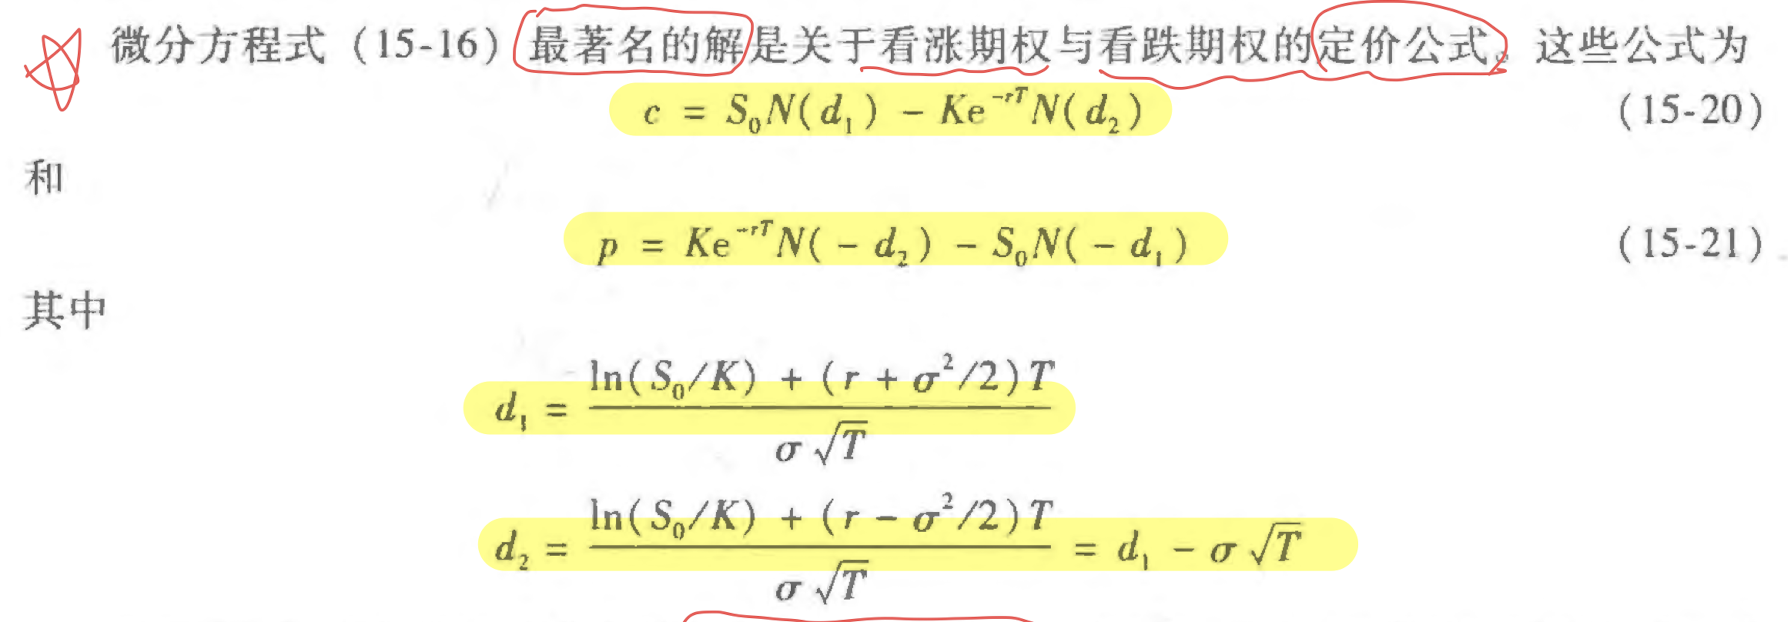


* 定义BS公式

In [98]:
def BS(s0,r,sigma,K,T=1):
    d1=(np.log(s0/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2=d1-sigma*np.sqrt(T)
    c=s0*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2)
    return(c)

In [140]:
acc=BS(130,0.05,0.3,K=132.04)
acc

17.537615715546877

## Part 3: numerical error analysis for time discretization

* 这里是最后不同时间离散程度的模拟结果

In [145]:
Price_hat2=[] #用于存储不同时间离散化程度模拟出的定价
Price_std2=[] #用于存储不同时间离散化程度模拟出的标准差
for N in range(1,1000,10):
    s0,u,sigma,K=130,0.05,0.3,132.04
    callprice,price_hat,hat_var=Call_pricing(s0,u,sigma,1/N,K,M=10000,T=1)
    Price_hat2.append(price_hat)
    Price_std2.append(np.sqrt(hat_var))

Text(0, 0.5, 'European Call Option Price')

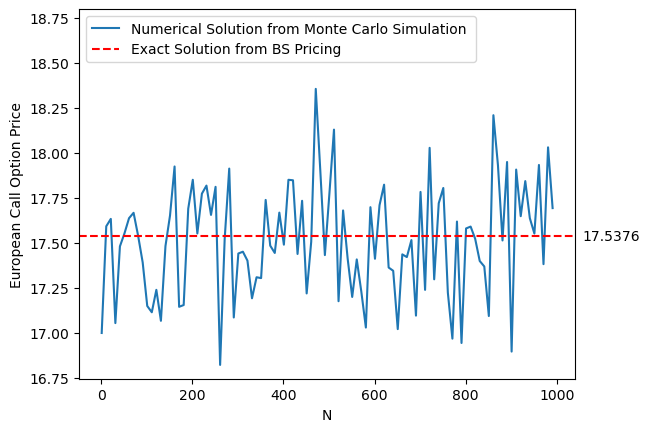

In [173]:
plt.plot(range(1,1000,10),Price_hat2)
plt.axhline(y=acc, ls='--', c='red') # 添加垂直线
plt.ylim(top=18.8)
plt.legend(['Numerical Solution from Monte Carlo Simulation ','Exact Solution from BS Pricing'],loc='upper left')
plt.text(1120, acc-0.04, '%.4f' % acc, ha='center', va= 'bottom',fontsize=10)
plt.xlabel('N')
plt.ylabel('European Call Option Price')

* numerical error

Text(0, 0.5, 'Numerical error')

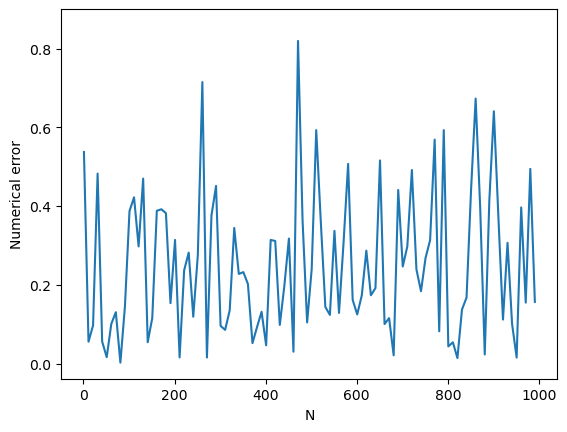

In [184]:
plt.plot(range(1,1000,10),np.abs(Price_hat2-acc))
#plt.axhline(y=0, ls='--', c='red') # 添加垂直线
plt.ylim(top=0.9)
#plt.legend(['Numerical error'])
#plt.text(1120, acc-0.04, '%.4f' % acc, ha='center', va= 'bottom',fontsize=10)
plt.xlabel('N')
plt.ylabel('Numerical error')

In [158]:
?plt.legend

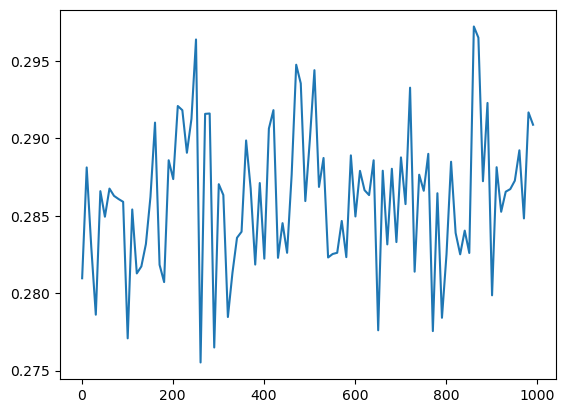

In [149]:
plt.plot(range(1,1000,10),Price_std2)


* 试验品一号

In [144]:
Price_hat=[] #用于存储不同时间离散化程度模拟出的定价
Price_std=[] #用于存储不同时间离散化程度模拟出的标准差
for N in range(1,1000,50):
    s0,u,sigma,K=130,0.05,0.3,132.04
    callprice,price_hat,hat_var=Call_pricing(s0,u,sigma,1/N,K,M=10000,T=1)
    Price_hat.append(price_hat)
    Price_std.append(np.sqrt(hat_var))

In [147]:
Price_hat

[17.669013339570114,
 17.07020131858273,
 17.51414935989264,
 17.841858016837424,
 17.4686026790122,
 17.142117353737977,
 17.202927903155064,
 17.963714000260097,
 17.398118539315455,
 17.54886077625164,
 17.434396962083223,
 17.099099989630595,
 17.83154150973741,
 17.545494934783356,
 17.87618195967842,
 18.09698078064561,
 18.27683941925056,
 17.219160765249864,
 18.131941724610115,
 17.215941850470752]

In [129]:
Price_std

[0.27947918939519006,
 0.28075367381475186,
 0.28369781735579047,
 0.2880913149255854,
 0.2810513068433781,
 0.2915305690271307,
 0.28895934913686055,
 0.2823960220856143,
 0.2861097883643189,
 0.2869519263547654,
 0.2910421227361674,
 0.27972945740896954,
 0.2835233473470366,
 0.28074453920117987,
 0.28675280394629243,
 0.28299098772559117,
 0.2830584809178615,
 0.2874894712002857,
 0.2942694507263532,
 0.28568383450912177]

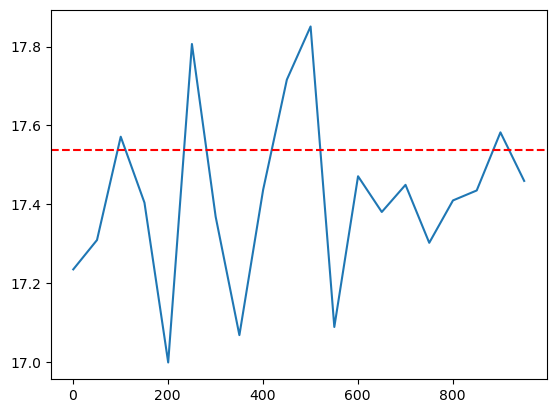

In [141]:
plt.plot(range(1,1000,50),Price_hat)
plt.axhline(y=acc, ls='--', c='red') # 添加垂直线

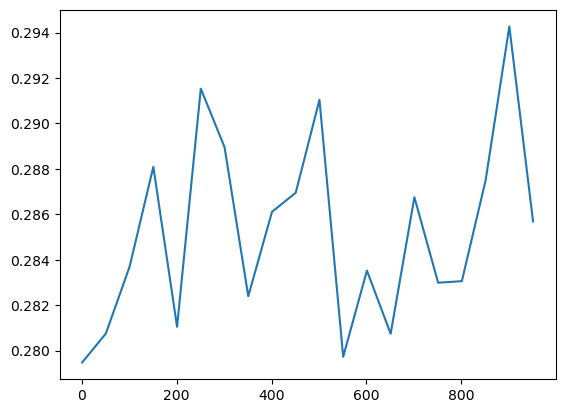

In [136]:
plt.plot(range(1,1000,50),Price_std)

* 试验品3号

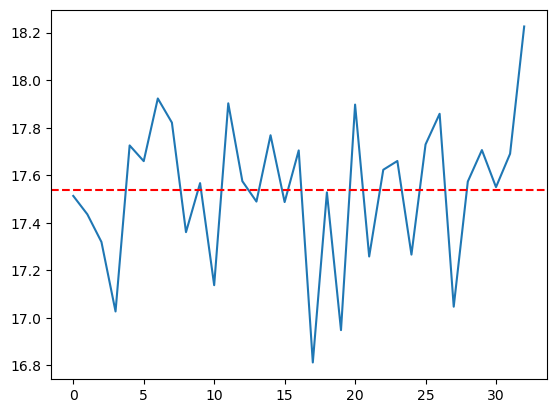

In [146]:
# plt.plot(Price_hat1)
# plt.axhline(y=acc, ls='--', c='red') # 添加垂直线

In [150]:

# Price_hat1=[] #用于存储不同时间离散化程度模拟出的定价
# Price_std1=[] #用于存储不同时间离散化程度模拟出的标准差
# for N in range(1,5000,100):
#     s0,u,sigma,K=130,0.05,0.3,132.04
#     callprice,price_hat,hat_var=Call_pricing(s0,u,sigma,1/N,K,M=10000,T=1)
#     Price_hat1.append(price_hat)
#     Price_std1.append(np.sqrt(hat_var))

In [ ]:
#plt.plot(range(1,1000,50),Price_std)

## 实验代码

In [3]:
#?np.random.normal

In [2]:
np.random.normal(0,1,size=100) #生成均值为0，标准差为1，数量为100的正态分布随机数

<function RandomState.normal>

In [ ]:
#?np.log #自然对数

In [94]:
#?norm.cdf #默认为N(0,1)